In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Read in the file
data= pd.read_csv("Online Retail.csv")

Check the descriptive statistics of the data

In [3]:
#Check the first few observations
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Check last few observations
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
#Check dimension of data- it has 8 columns with 541909 rows
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


In [7]:
#Check for null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The dataset has two columns with missing values- CustomerID and Description. 

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


- Quantity and unit price have negative values
- Max values of Quantity and unit price are outliers.
- missing customer IDs


In [9]:
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909,NaN,NaN,NaN,9.55225,218.081,-80995,1,3,10,80995
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909,NaN,NaN,NaN,4.61111,96.7599,-11062.1,1.25,2.08,4.13,38970
CustomerID,406829,NaN,NaN,NaN,15287.7,1713.6,12346,13953,15152,16791,18287
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-Only 25900 unique invoice numbers i.e. one invoice has been split item wise in each row.
- missing values present in Description and Customer IDs
- The most frequently sold item is 'White hanging heart light holder'

In [10]:
#Check for duplicates and drop them
print("Number of duplicates in the dataset are:", data.duplicated().sum())

Number of duplicates in the dataset are: 5268


In [11]:
data.drop_duplicates(keep='first', inplace= True)
data.shape

(536641, 8)

# Fix price and quantity- only take positive values

As seen above, price and quantity have negative values which would affect the model. Negative quntity and price could indicate returned items or discounts on price. For the analysis and segmentation, only positive values are considered.

In [12]:
#Check for negative values- they are returned products
data.loc[data['Quantity']<0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


Looking at item descriptions, it looks like they are adjustments, returns, discounts etc and will be dropped prior to evaluation

In [13]:
data2= data.loc[data['Quantity']>0]
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526054.0,10.730874,157.591838,1.00,1.00,4.00,11.00,80995.00
UnitPrice,526054.0,3.871747,42.016560,-11062.06,1.25,2.08,4.13,13541.33
CustomerID,392732.0,15287.734822,1713.567773,12346.00,13955.00,15150.00,16791.00,18287.00


In [14]:
#Fix price- bad debt adjustment
data2.loc[data2['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [15]:
data2= data2.loc[data2['UnitPrice']>0]
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,524878.0,10.616600,156.280031,1.000,1.00,4.00,11.00,80995.00
UnitPrice,524878.0,3.922573,36.093028,0.001,1.25,2.08,4.13,13541.33
CustomerID,392692.0,15287.843865,1713.539549,12346.000,13955.00,15150.00,16791.00,18287.00


In [16]:
#Create a new col for revenue from quantity and price
data2['Revenue']= data2['Quantity']* data2['UnitPrice']
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# Fix Date- split into year, month and day

In [17]:
data2['InvoiceDate'] =pd.to_datetime(data2['InvoiceDate'])
data2['Year_Month']= pd.to_datetime(data2['InvoiceDate']).dt.to_period('M')
data2['Year']= pd.DatetimeIndex(data2['InvoiceDate']).year
data2['Month']= pd.DatetimeIndex(data2['InvoiceDate']).month
data2['Date']= pd.DatetimeIndex(data2['InvoiceDate']).day
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year_Month,Year,Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1


In [18]:
#Missing values
data2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
Revenue             0
Year_Month          0
Year                0
Month               0
Date                0
dtype: int64

In [19]:
#Looking at each variable- Customer IDs first- let's take a look at missing data fields
miss_ID= pd.isnull(data['CustomerID'])
data2[miss_ID].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year_Month,Year,Month,Date
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,2010-12,2010,12,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,2010-12,2010,12,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40,2010-12,2010,12,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32,2010-12,2010,12,1
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94,2010-12,2010,12,1
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,2010-12,2010,12,1
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.30,2010-12,2010,12,1
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,3.87,2010-12,2010,12,1
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.73,2010-12,2010,12,1
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,2010-12,2010,12,1


Since the idea is to segment the users into clusters based on RFM, it would make sense to drop the missing user IDs and missing users cannot be segmented appropriately.

In [20]:
#Since they have varying purchase behaviour, it wouldn't make sense to impute them
data2.dropna(subset=['CustomerID'],  inplace= True)

In [21]:
data2['CustomerID'].isnull().sum()

0

In [22]:
#Check for non revenue producing items and drop them
data2[data2['Revenue']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year_Month,Year,Month,Date


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo      392692 non-null object
StockCode      392692 non-null object
Description    392692 non-null object
Quantity       392692 non-null int64
InvoiceDate    392692 non-null datetime64[ns]
UnitPrice      392692 non-null float64
CustomerID     392692 non-null float64
Country        392692 non-null object
Revenue        392692 non-null float64
Year_Month     392692 non-null period[M]
Year           392692 non-null int64
Month          392692 non-null int64
Date           392692 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4), period[M](1)
memory usage: 36.0+ MB


In [24]:
#Drop columns not needed for analysis
data2.drop(['StockCode', 'UnitPrice'], axis=1, inplace= True)

In [25]:
data2.head()

,InvoiceNo,Description,Quantity,InvoiceDate,CustomerID,Country,Revenue,Year_Month,Year,Month,Date
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,17850.0,United Kingdom,15.30,2010-12,2010,12,1
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2010-12,2010,12,1
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,17850.0,United Kingdom,22.00,2010-12,2010,12,1
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2010-12,2010,12,1
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2010-12,2010,12,1


In [26]:
data2.describe()

,Quantity,CustomerID,Revenue,Year,Month,Date
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,15287.843865,22.631500,2010.934631,7.601871,15.044656
std,180.492832,1713.539549,311.099224,0.247177,3.415015,8.652532
min,1.000000,12346.000000,0.001000,2010.000000,1.000000,1.000000
25%,2.000000,13955.000000,4.950000,2011.000000,5.000000,7.000000
50%,6.000000,15150.000000,12.450000,2011.000000,8.000000,15.000000
75%,12.000000,16791.000000,19.800000,2011.000000,11.000000,22.000000
max,80995.000000,18287.000000,168469.600000,2011.000000,12.000000,31.000000


In [27]:
pd.options.display.float_format = '{:.4f}'.format

# EDA

Text(0.5, 1.0, 'Monthwise Revenue')

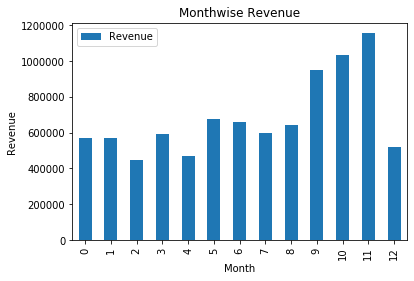

In [28]:
#Checking revenue for months across two years
data2.groupby('Year_Month')['Revenue'].sum().reset_index().plot(kind= 'bar')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthwise Revenue")

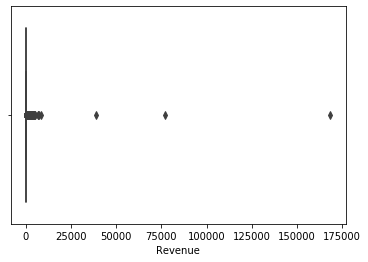

In [29]:
#Check for ouliers in Revenue
sns.boxplot(data2['Revenue'])

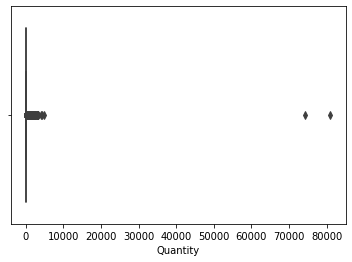

In [30]:
#Check for outliers in quantity
sns.boxplot(data2['Quantity'])

Even though outliers are present in Quantity and Revenue columns, i have decided to keep them as they are different segments of users who are buying in bulk or displaying different user behaviour.

In [31]:
#Take a look at outliers- all include bulk quantities- they are probably organizational buyers.
data2.loc[data2['Quantity']>= 4000]

,InvoiceNo,Description,Quantity,InvoiceDate,CustomerID,Country,Revenue,Year_Month,Year,Month,Date
61619,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,12346.0000,United Kingdom,77183.6000,2011-01,2011,1,18
206121,554868,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,13135.0000,United Kingdom,3096.0000,2011-05,2011,5,27
421632,573008,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,12901.0000,United Kingdom,1008.0000,2011-10,2011,10,27
540421,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,16446.0000,United Kingdom,168469.6000,2011-12,2011,12,9


# Countries with Highest Sales

In [32]:
#Countries with highest revenue
hr_countries= data2.groupby('Country')['Revenue'].sum().reset_index().sort_values(by= 'Revenue', ascending= False).head(10)
hr_countries

,Country,Revenue
35,United Kingdom,7285024.6440
23,Netherlands,285446.3400
10,EIRE,265262.4600
14,Germany,228678.4000
13,France,208934.3100
0,Australia,138453.8100
30,Spain,61558.5600
32,Switzerland,56443.9500
3,Belgium,41196.3400
31,Sweden,38367.8300


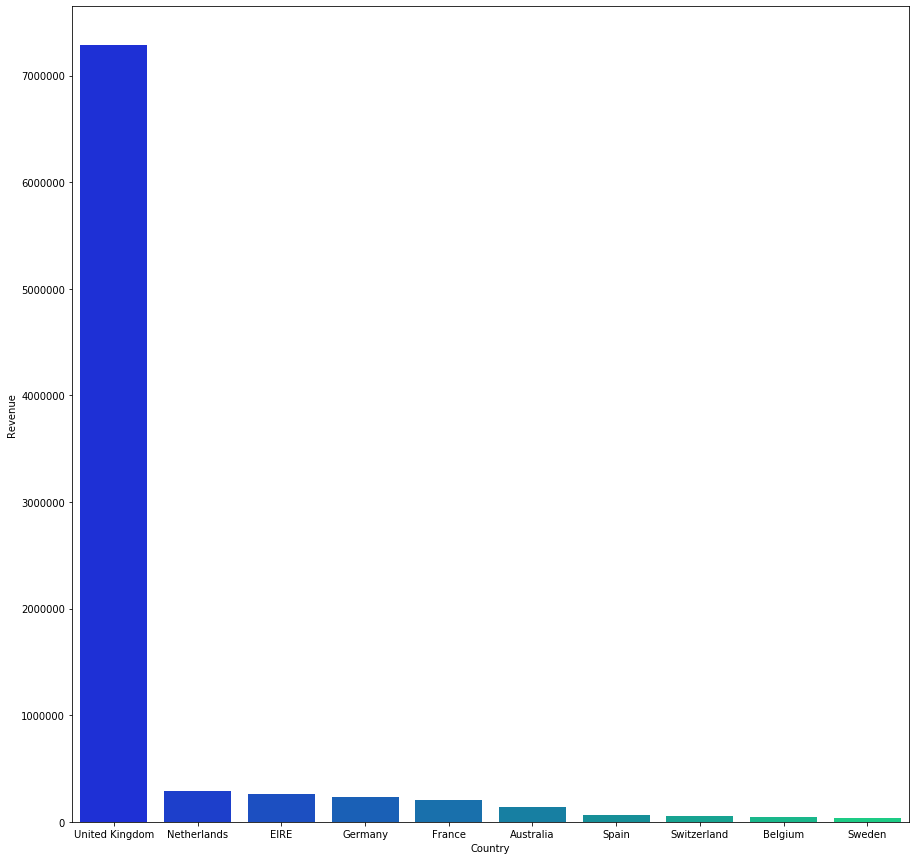

In [33]:
#Look at top 10 countries with highest revenue
plt.figure(figsize=(15, 15))
sns.barplot(x= 'Country', y= 'Revenue', data= hr_countries, palette= 'winter')


In [34]:
#Countries with maximum number of customers
cr_countries= data2.groupby('Country')['CustomerID'].count().reset_index().sort_values(by= 'CustomerID', ascending= False).head(15)
cr_countries

,Country,CustomerID
35,United Kingdom,349203
14,Germany,9025
13,France,8326
10,EIRE,7226
30,Spain,2479
23,Netherlands,2359
3,Belgium,2031
32,Switzerland,1841
26,Portugal,1453
0,Australia,1181


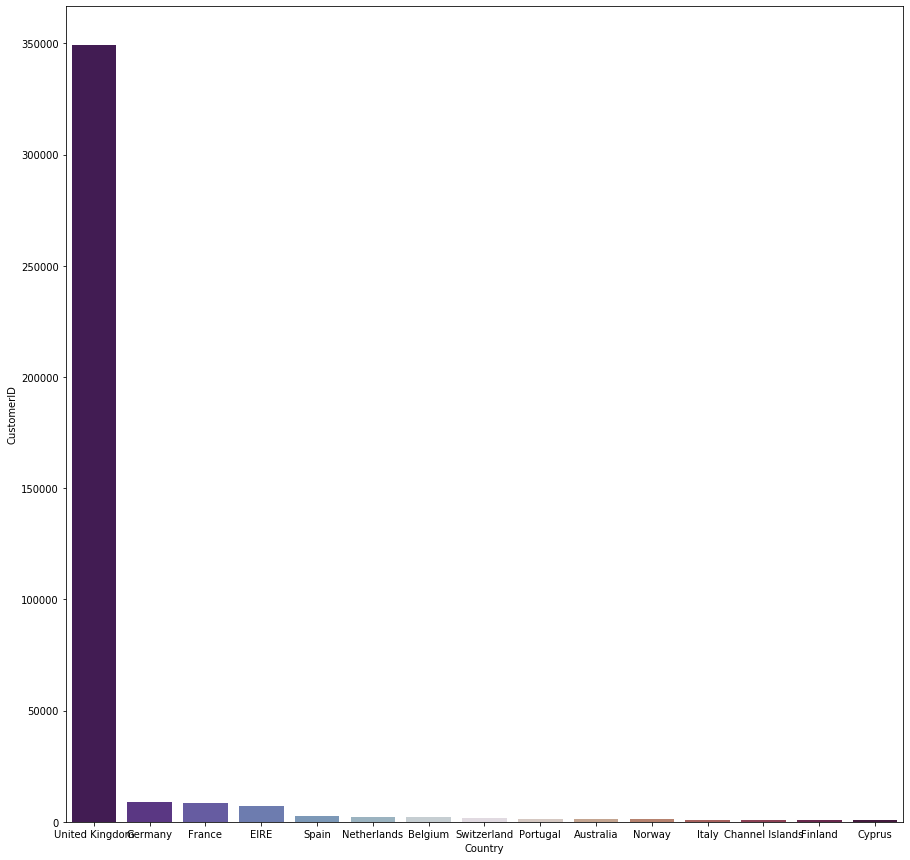

In [35]:
#Look at top 10 countries with highest number of Customers
plt.figure(figsize=(15, 15))
sns.barplot(x= 'Country', y= 'CustomerID', data= cr_countries, palette= 'twilight_shifted')


The united Kingdom has the highest share in terms of Revenue and number of users which would make sense as the data comes from a major UK retailer.

# Time Based Analysis

In [36]:
#what time frame does the data cover( 1/12/2010- 9/12/2020)
print("The data starts from:", data2['InvoiceDate'].min())
print("The data ends at:", data2['InvoiceDate'].max())

The data starts from: 2010-12-01 08:26:00
The data ends at: 2011-12-09 12:50:00


In [37]:
#Check Monthwise Revenue
rev_month= data2.groupby(['Month', 'Year'])['Revenue'].sum().sort_values(ascending= False).reset_index()
rev_month

,Month,Year,Revenue
0,11,2011,1156205.6100
1,10,2011,1035642.4500
2,9,2011,950690.2020
3,5,2011,677355.1500
4,6,2011,660046.0500
5,8,2011,644051.0400
6,7,2011,598962.9010
7,3,2011,594081.7600
8,12,2010,570422.7300
9,1,2011,568101.3100


Text(0, 0.5, 'Revenue')

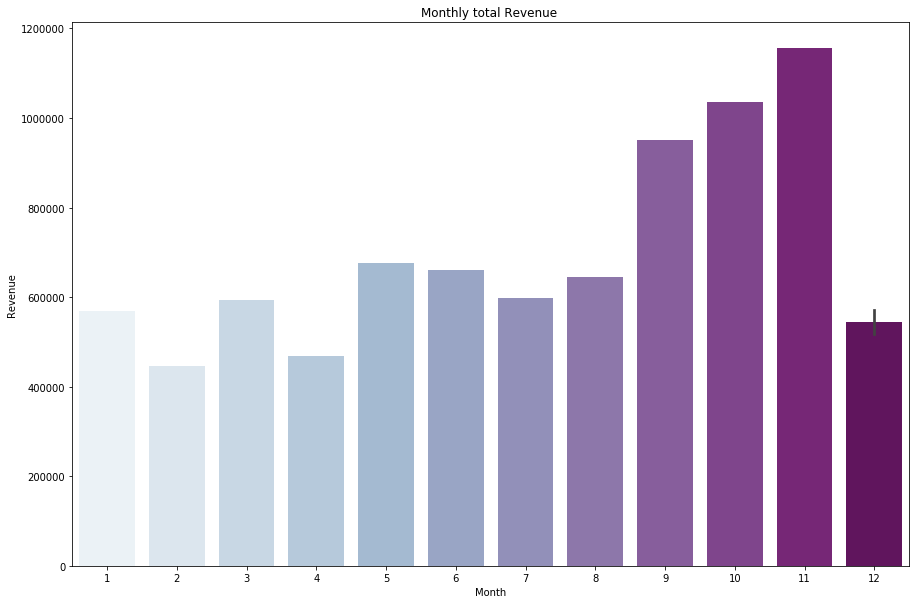

In [38]:
#Average Revenue per month
data2.groupby('Year_Month')['Revenue'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="Month", y="Revenue", data=rev_month, palette= 'BuPu')
plt.title("Monthly total Revenue ")
plt.xlabel("Month")
plt.ylabel("Revenue")

Text(0, 0.5, 'Revenue')

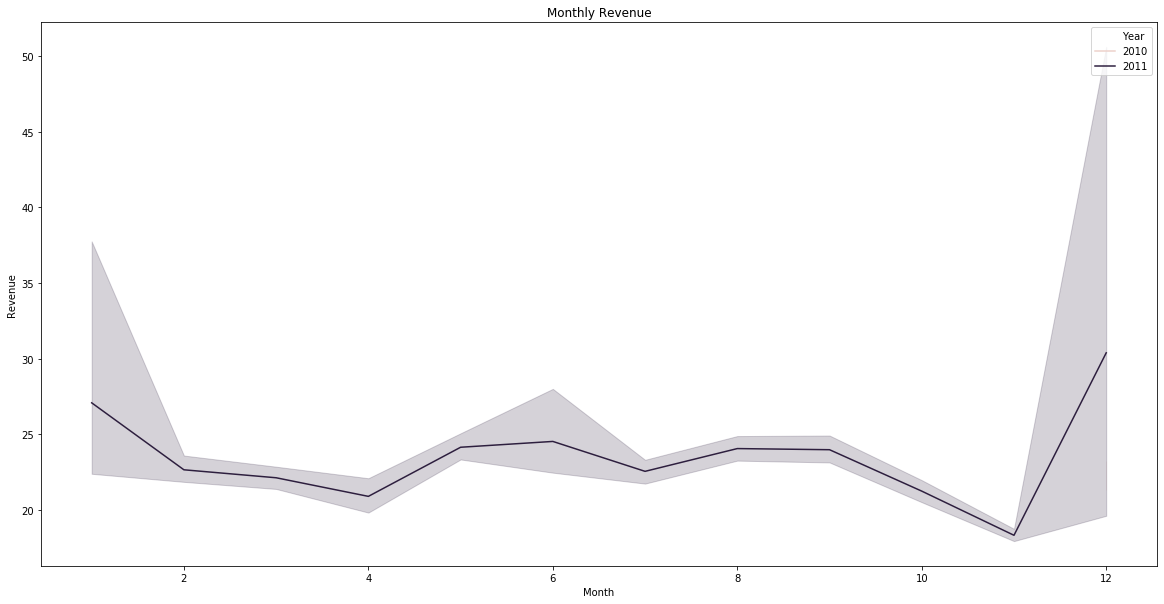

In [39]:
#Monthwise Analysis of Revenue
plt.figure(figsize= (20, 10))
sns.lineplot(x= 'Month', y= 'Revenue', hue= 'Year', data= data2)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")


Maximum number of sales happen during later part of the year especially in November. One possible explanation can be holiday season.

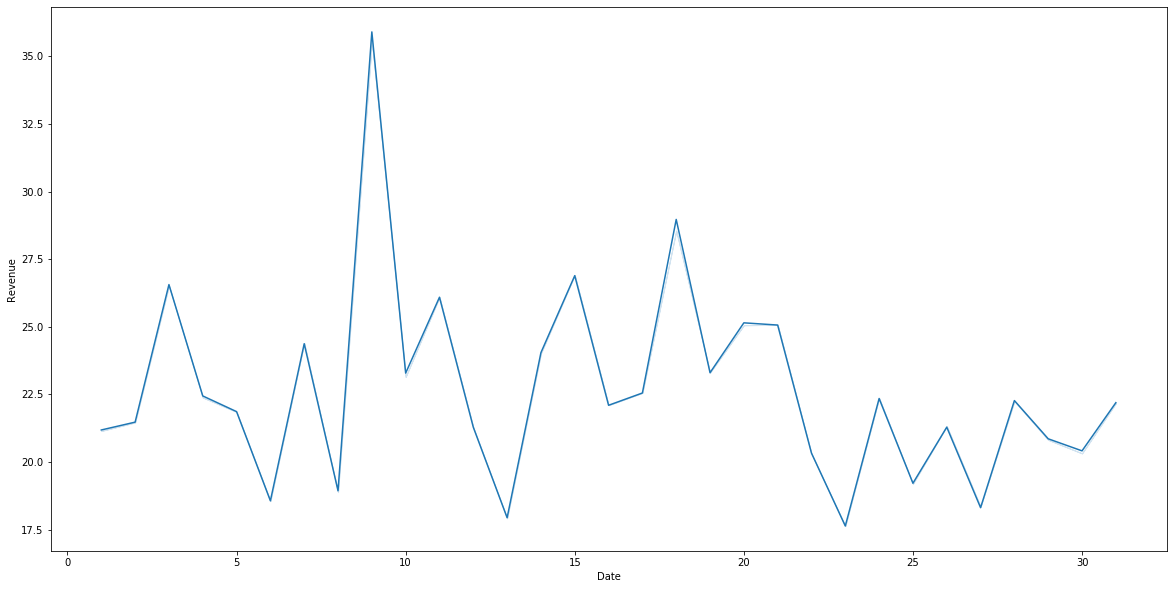

In [40]:
#Daywise Analysis of Revenue for the year- takes a spike around 18- 20th
plt.figure(figsize= (20, 10))
sns.lineplot(x= 'Date', y= 'Revenue', data= data2, ci= False)

In [41]:
#Checking Day wise Sales across months
monthly_sales_across_days = pd.pivot_table(data2, values = 'Revenue', columns = 'Month', index = 'Date')
monthly_sales_across_days

Month,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
1,nan,21.6410,21.6315,22.1010,15.6011,21.9720,14.8489,19.9175,26.8574,nan,17.0696,22.5480
2,nan,17.5114,21.0917,nan,nan,27.2876,nan,22.2769,27.5081,8.2412,22.2368,23.5310
3,nan,26.2700,35.8669,9.8319,29.6177,23.1854,10.3514,20.1005,nan,35.8587,31.4473,21.9858
4,16.4248,25.0179,19.7518,24.3272,24.2591,nan,33.6319,42.6627,13.1652,19.0847,23.1669,10.7332
5,27.5593,nan,nan,30.7261,20.9234,16.9492,32.6079,16.0456,26.0014,34.8941,nan,15.0652
6,27.2354,12.5995,12.2558,15.9928,23.6431,15.6734,18.7831,nan,24.6058,23.1764,12.7271,17.4998
7,22.1787,24.7439,18.5590,13.1199,nan,23.6584,22.3599,14.4758,22.4157,25.4878,16.7561,38.0804
8,nan,23.0510,18.8320,22.2076,12.9543,20.7311,22.3991,18.2646,16.6174,nan,16.9564,20.3018
9,14.5165,27.1937,20.1390,nan,20.4817,30.8365,nan,29.5221,19.8440,10.1881,28.6846,94.7312


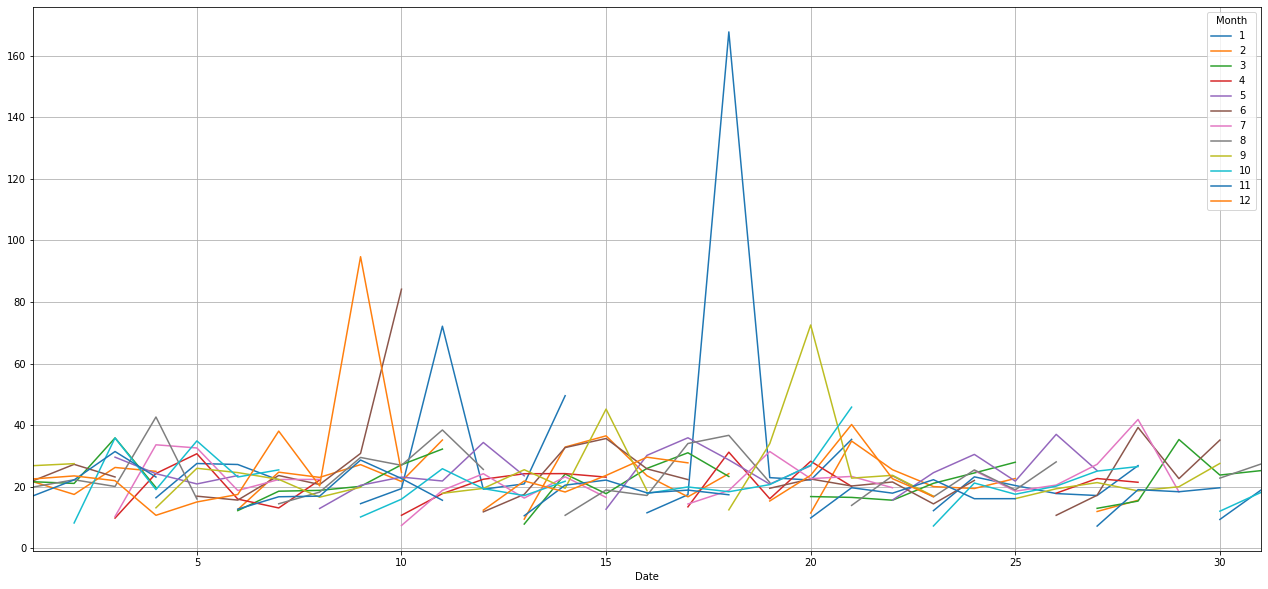

In [42]:
#Plot of day vs monthwise Revenue
fig, ax = plt.subplots(figsize=(22,10))
monthly_sales_across_days.plot(ax=ax)
plt.grid();

As can be seen here, two months are standing out- November and December with spikes around 8th-10th and 17th- 19th days.

# Recency Segmentation

In [43]:
#Calculation of Recency
recent= data2.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recent.columns= ['CustomerID', 'Last_Purchase_Date']

In [44]:
#Subtract last purchase date from 1/1/2012 to get number of days
import datetime as dt

chosen_date= dt.datetime(2012, 1, 1)
chosen_date

datetime.datetime(2012, 1, 1, 0, 0)

In [45]:
recent['date_calc']= chosen_date
recent.head()

,CustomerID,Last_Purchase_Date,date_calc
0,12346.0000,2011-01-18 10:01:00,2012-01-01
1,12347.0000,2011-12-07 15:52:00,2012-01-01
2,12348.0000,2011-09-25 13:13:00,2012-01-01
3,12349.0000,2011-11-21 09:51:00,2012-01-01
4,12350.0000,2011-02-02 16:01:00,2012-01-01


In [46]:
#get the difference
recent['Recent']= (recent['date_calc']- recent['Last_Purchase_Date']).dt.days
recent.head()

,CustomerID,Last_Purchase_Date,date_calc,Recent
0,12346.0000,2011-01-18 10:01:00,2012-01-01,347
1,12347.0000,2011-12-07 15:52:00,2012-01-01,24
2,12348.0000,2011-09-25 13:13:00,2012-01-01,97
3,12349.0000,2011-11-21 09:51:00,2012-01-01,40
4,12350.0000,2011-02-02 16:01:00,2012-01-01,332


In [47]:
recent_df= recent[['CustomerID', 'Recent']]
recent_df.columns= ['CustomerID', 'Days_Since_Last_purchase']

In [48]:
recent_df.head()

,CustomerID,Days_Since_Last_purchase
0,12346.0000,347
1,12347.0000,24
2,12348.0000,97
3,12349.0000,40
4,12350.0000,332


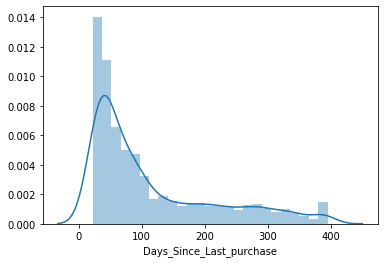

In [49]:
# A quick look at distribution of Days since last purchase
sns.distplot(recent_df['Days_Since_Last_purchase']);

In [50]:
recency= recent_df[['Days_Since_Last_purchase']]

Method for segmentation has been chosen as K-Means Algorithm and the model has then been validated for WSS (Within sum of squares) as well as silhoutte scores.

In [51]:
#Run a K-Means Clsutering on the dataset- check wss scores for optimum number of cluster
from sklearn.cluster import KMeans
wss= []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(recency)
    wss.append(KM.inertia_)

In [52]:
wss

[43380638.65560155,
 8909754.553132169,
 4289195.93596951,
 2417407.7447175863,
 1504887.5182202756,
 1041168.3347397543,
 790785.2132053883,
 606744.5256285561,
 466550.5960022118,
 364951.4251492162]

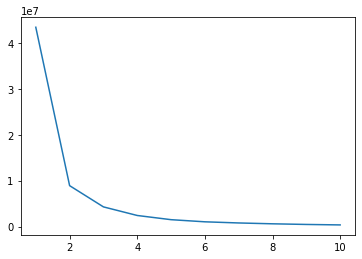

In [53]:
#Plot wss to get a better idea of clusters
plt.plot(range(1,11), wss)

The scree plot above shows two breaks- at 2 and at 4. However, it is at 4 that the wss values doesn't show much decline. Since 2 clusters will not give a clear idea, I have decided to go with 4 clusters


In [54]:
#Fit the model
k_means = KMeans(n_clusters = 4)
k_means.fit(recency)
labels = k_means.labels_

In [55]:
#Add to the labels to the df
recent_df["Clus_kmeans"] = labels
recent_df.head(5)

,CustomerID,Days_Since_Last_purchase,Clus_kmeans
0,12346.0000,347,1
1,12347.0000,24,3
2,12348.0000,97,0
3,12349.0000,40,3
4,12350.0000,332,1


In [56]:
#Check the silhoutte score to see if we have the right clusters- A value above 0.5 can be considered a good model
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(recency,labels)

0.6191056222395784

In [57]:
sil_width = silhouette_samples(recency, labels)
recent_df["sil_width"] = sil_width

In [58]:
#Minimum value should not be zero- clusters have been distirbuted well
silhouette_samples(recency, labels).min()

0.01323946148013723

In [59]:
#Check the distribution of Clusters
recent_df.groupby(['Clus_kmeans'])['Days_Since_Last_purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Clus_kmeans,,,,,,,,
0,1039.0000,105.7623,24.3679,74.0000,86.0000,100.0000,122.5000,160.0000
1,497.0000,330.4869,39.0209,274.0000,296.0000,327.0000,358.0000,395.0000
2,598.0000,215.0184,31.5870,162.0000,188.0000,213.0000,240.0000,272.0000
3,2204.0000,41.7740,14.2992,22.0000,30.0000,39.0000,52.0000,73.0000


Text(0.5, 1.0, 'Number of Users in each Cluster')

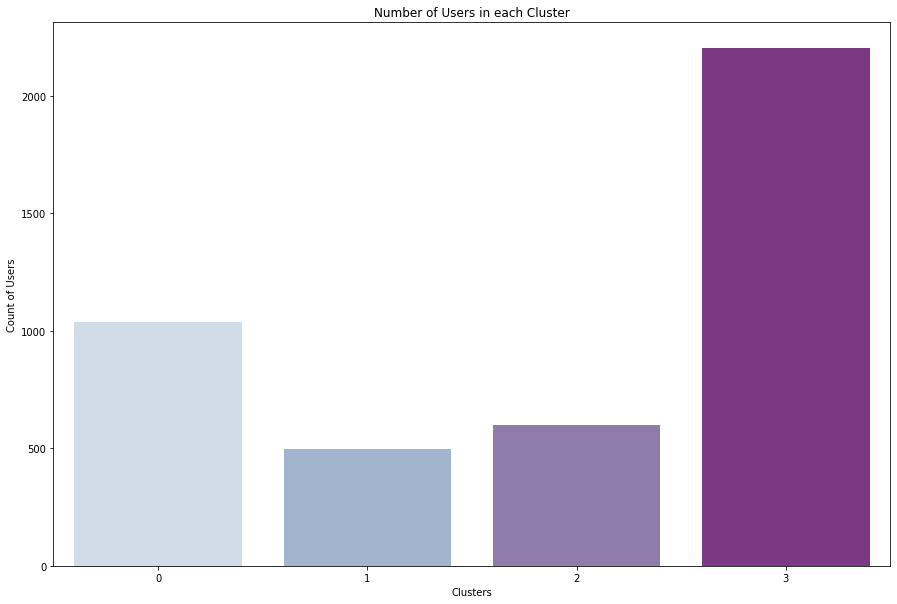

In [60]:
plt.figure(figsize= (15, 10))
sns.countplot(recent_df['Clus_kmeans'], palette= 'BuPu');
plt.xlabel("Clusters")
plt.ylabel("Count of Users")
plt.title("Number of Users in each Cluster")

Text(0.5, 1.0, 'Recency vs Clusters')

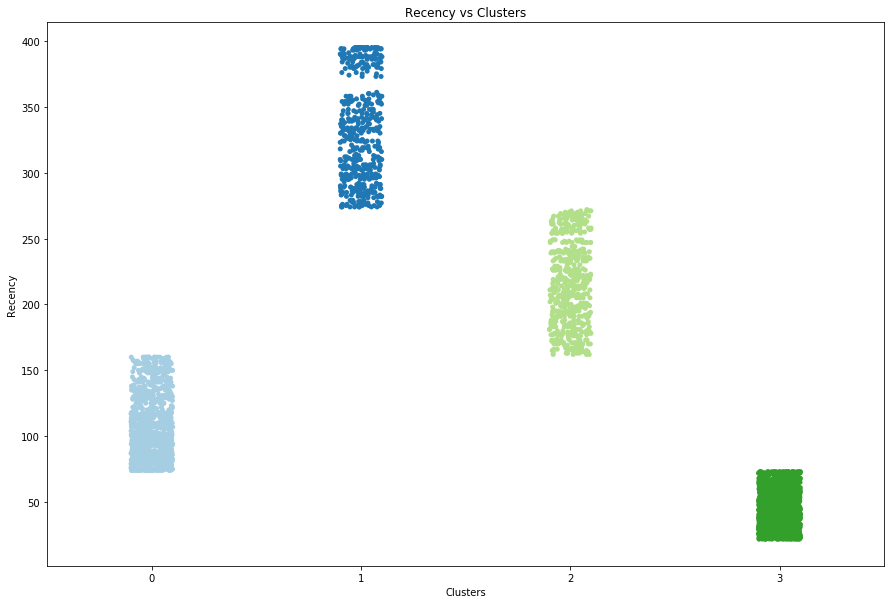

In [61]:
plt.figure(figsize= (15, 10))
sns.stripplot(data= recent_df, x='Clus_kmeans', y= 'Days_Since_Last_purchase', palette= 'Paired');
plt.xlabel("Clusters")
plt.ylabel("Recency")
plt.title("Recency vs Clusters")


The data can be divided into 4 clusters of users based on the recency of their purchase behaviour:
- Cluster 1: It has the highest number of users (2204) and ranges from minimum 22 to maximum 73 days of purchase. These are frequent shoppers. They are likely to be monthly customers.
- Cluster 2: This cluster has 1039 users and varies from minimum 74 days to maximum 160 days of purchase. These users are average shoppers. Their shopping interval varies from two- five months.
- Cluster 3: This cluster has 598 users who shop from anywhere between 162- 272 days. They are infrequenct shoppers.
- Cluster 4: This cluster has the least number of users (497) whose last purchase was somewhere between 274 to 395 days implying that these users haven't returned to the store in approximately a year. They are likely to be lost users.

# Frequency Based Segmentation

In [62]:
freq_df= data2.groupby('CustomerID')['InvoiceNo'].count().reset_index()
freq_df.columns= ['CustomerID', 'Frequency']
freq_df.head()

,CustomerID,Frequency
0,12346.0000,1
1,12347.0000,182
2,12348.0000,31
3,12349.0000,73
4,12350.0000,17


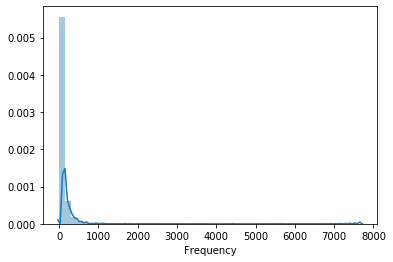

In [63]:
#Disrtibution of Freq of Purchase
sns.distplot(freq_df['Frequency'])

In [64]:
#Clustering them based on Hierarchial clustering
freq= freq_df[['Frequency']]

For frequency clustering, decided to go with Hierarchial method of clustering using distance as 'Ward' distance.

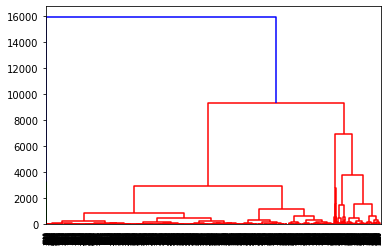

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(freq, method = 'ward')
dend = dendrogram(wardlink)

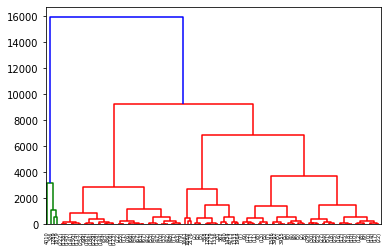

In [66]:
#Looking at last 100 observations

dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 100,
                 )

In [67]:
#Forming clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters


array([2, 3, 2, ..., 2, 3, 2], dtype=int32)

In [68]:
freq_df['freq_clust']= clusters

In [69]:
freq_df.groupby('freq_clust')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
freq_clust,,,,,,,,
1,4.0000,5717.2500,1403.5848,4412.0000,4936.2500,5390.5000,6171.5000,7676.0000
2,3737.0000,45.4894,39.2559,1.0000,15.0000,32.0000,67.0000,159.0000
3,597.0000,334.7219,256.0143,160.0000,197.0000,259.0000,371.0000,2677.0000


Text(0.5, 1.0, 'User count in each Cluster')

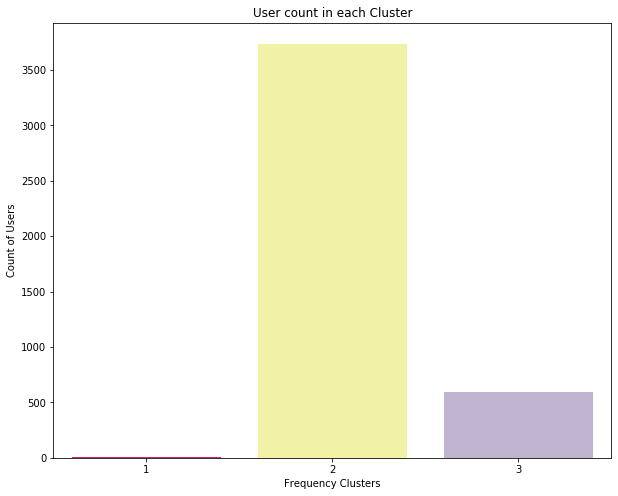

In [70]:
plt.figure(figsize= (10, 8))
sns.countplot(freq_df['freq_clust'], palette= 'Accent_r')
plt.xlabel("Frequency Clusters")
plt.ylabel("Count of Users")
plt.title("User count in each Cluster")

Text(0.5, 1.0, 'Purchase Frequency in each Cluster')

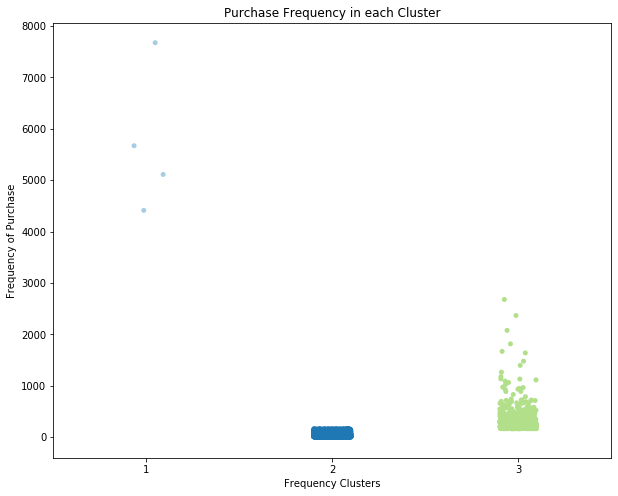

In [71]:
plt.figure(figsize= (10, 8))
sns.stripplot(data= freq_df, x= 'freq_clust', y= 'Frequency',  palette= 'Paired')
plt.xlabel("Frequency Clusters")
plt.ylabel("Frequency of Purchase")
plt.title("Purchase Frequency in each Cluster")

The data can be divided into 3 clusters of users based on the recency of their purchase behaviour:
- Cluster 1: It has the least number of consumers (4) who have the highest purchase frequency. These 4 consumers are the most frequenct shoppers.
- Cluster 2: This cluster has the highest number of consumers (3737) whose purchse frequency varies from 1 to 159. These consumers are the least frequent shoppers.
- Cluster 3: This cluster has 597 users whose purchase frequency varies from 160 to 2677. They are average shoppers.

# Monetary Analysis- Segmentation Based on Revenue

In [72]:
mon_df= data2.groupby(['CustomerID'])['Revenue'].sum().reset_index()
mon_df.head()

,CustomerID,Revenue
0,12346.0000,77183.6000
1,12347.0000,4310.0000
2,12348.0000,1797.2400
3,12349.0000,1757.5500
4,12350.0000,334.4000


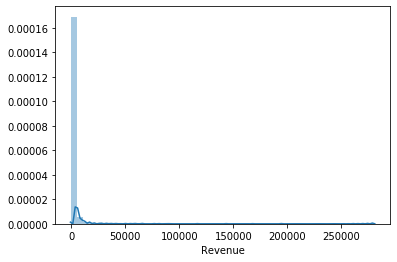

In [73]:
#Checking the distribution of revenue
sns.distplot(mon_df['Revenue'])

Most of the revenue is centered around 0- 1000 with some values going over 10,000 which as was seen above is because of huge quntities of couple of items ordered.

In [74]:
rev= mon_df[['Revenue']]

In [75]:
#Use k-means clustering to get clusters
wss= []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(rev)
    wss.append(KM.inertia_)


In [76]:
#Print different wss values
wss

[350144928456.10803,
 117414435782.67361,
 55032310540.15318,
 35104048257.62955,
 20936849106.964413,
 14039184648.122793,
 10248678973.605389,
 6900771799.830155,
 5388424795.49765,
 4034273301.542363]

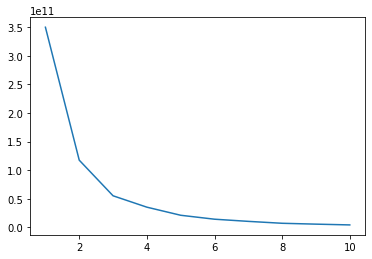

In [77]:
#Plot the wss values to get the elbow point for clusters
plt.plot(range(1,11), wss)

The graph begins to show least change after 4, so will be using 4 clusters for segmentation

In [78]:
#Fitting the model with 4 clusters
k_means = KMeans(n_clusters = 4)
k_means.fit(rev)
labels = k_means.labels_


In [79]:
#Check their silhoutte score
silhouette_score(rev,labels)

0.9548708041009409

In [80]:
mon_df['Revenue_Clusters']= labels

In [81]:
#Check silhoutte width 
sil_width = silhouette_samples(mon_df,labels)
mon_df["sil_width"] = sil_width
mon_df.head(5)

,CustomerID,Revenue,Revenue_Clusters,sil_width
0,12346.0000,77183.6000,2,0.5416
1,12347.0000,4310.0000,0,0.8876
2,12348.0000,1797.2400,0,0.9199
3,12349.0000,1757.5500,0,0.9202
4,12350.0000,334.4000,0,0.9225


In [82]:
#Check for minimum value of silhoutte width
mon_df['sil_width'].min()

0.13268192027543352

A positive value of silhoutte width means that all dats has been segmented properly.

In [83]:
mon_df.groupby('Revenue_Clusters')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue_Clusters,,,,,,,,
0,4300.0000,1433.0173,2223.3730,3.7500,304.9650,658.7600,1614.4600,21429.3900
1,5.0000,149739.8140,31841.1921,117210.0800,124914.5300,143711.1700,168472.5000,194390.7900
2,31.0000,46344.2665,17875.3604,25977.1600,31870.2500,40519.8400,58636.2800,91062.3800
3,2.0000,269931.6600,14530.1393,259657.3000,264794.4800,269931.6600,275068.8400,280206.0200


Text(0, 0.5, 'Count of Users in each Cluster')

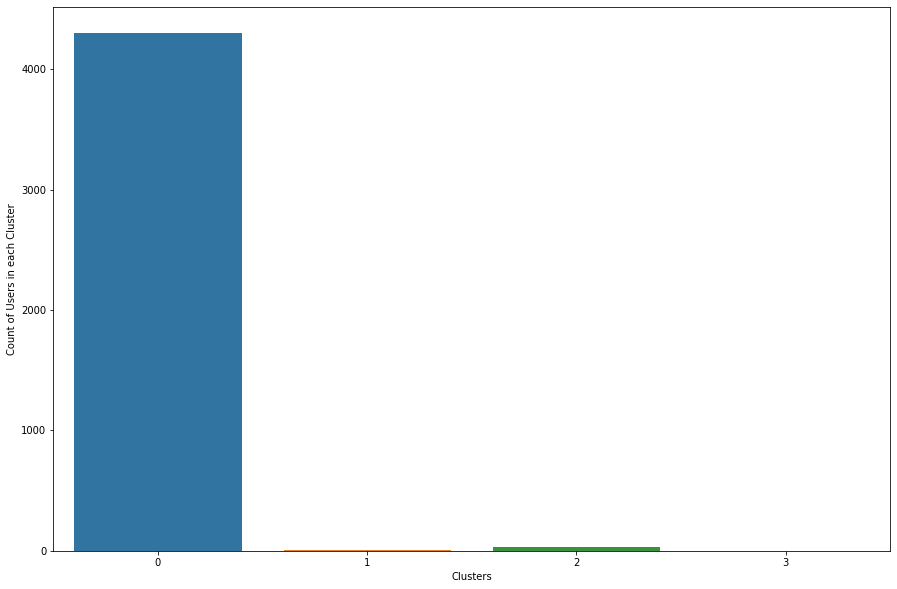

In [84]:
plt.figure(figsize= (15, 10))
sns.countplot(mon_df['Revenue_Clusters'])
plt.xlabel("Clusters")
plt.ylabel("Count of Users in each Cluster")

Text(0.5, 1.0, 'Clusterwise Revenue')

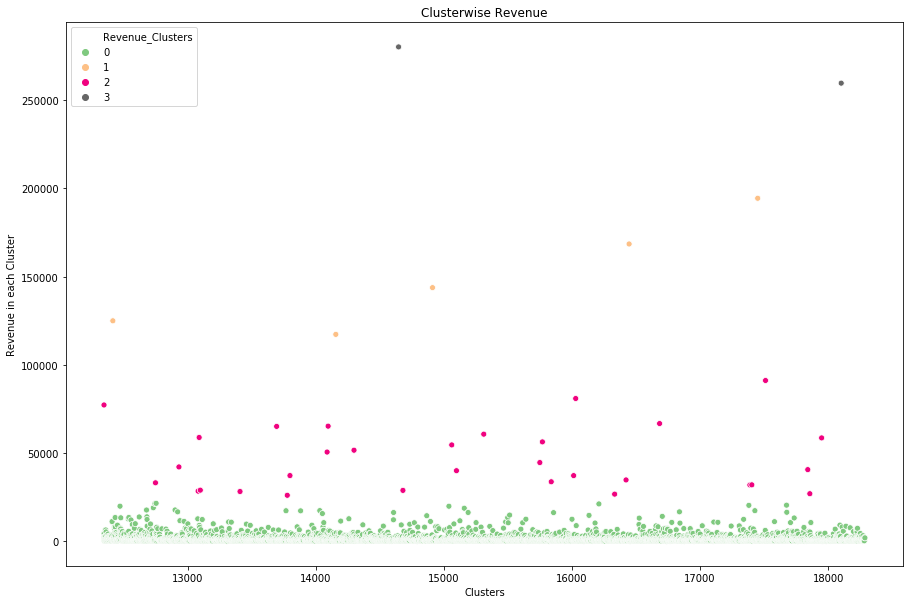

In [85]:
plt.figure(figsize= (15, 10))
sns.scatterplot(x= 'CustomerID', y= 'Revenue', hue= 'Revenue_Clusters',  data= mon_df, palette= 'Accent')
plt.xlabel("Clusters")
plt.ylabel("Revenue in each Cluster")
plt.title("Clusterwise Revenue")


The data can be divided into 4 clusters of users based on the Monetary value of their purchase behaviour:
- Cluster 0: It has the highest number of users (4300) and ranges from a minimum purchase of 3.75 to maximum 21429 of purchase. These users are probably buying more in terms of quantity but the average price of item is lesser.
- Cluster 1: This cluster has only 5 users and varies from minimum purchase of 117210 to maximum amount of 194390. These users appear to be bulk shoppers who have ordered in huge quantities.
- Cluster 2: This cluster has only 2 users and varies from minimum purchase amount of 259657 to maximum amount of 280206. These users appear to be bulk shoppers who have ordered in huge quantities. These two users are also the highest paying customers. Clusters 2 and 1 combined contribute to a majority of the Revenue generated.
- Cluster 4: It has the 31 users and ranges from a minimum purchase amount of 25988 to maximum amount of 91062. These users seem to be buying normally.

# Conclusion

The user base can be segmented into 4 clusters based on the Recenecy, Frequency and Monetary value of their purchase. This helps the store determine user purchase patterns like the how long has it been since a user made a purchase, how frequent the user is as well how much does a user from a segment spend on an average.

Based on the segmentation, the store can optimize its marketing techniques and see which users are at the risk of becoming latent and which users need more attention. It can also help the store in managing inventory better by looking at purchase patterns and analyzing when do users make most purchases as well as look at their highest paying consumers.